# Analysis of the open and closed boundry for (gamma = 0 ,L=2, J=10)

In this notebook we test the generalised `LQubitCorrelationSimulator` for a two‑qubit chain with Hamiltonian coupling (`J = 10`) but without measurment rate (`gamma = 0`).  We compare **open** boundary conditions (OBC) with **closed** boundary conditions (CBC).  The simulator evolves the correlation matrix under measurement back‑action and records the magnetisation `⟨σᶻ_i⟩` on each site as well as the entropy production `Q`.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from l_qubit_correlation_simulator import LQubitCorrelationSimulator


### Trajectory Sanity Check
simultaing results for OBC, L = 2, epsilon = 0

Simulation parameters:
  J = 10.0
  ε = 0.0
  N = 10000
  T = 1.0
  dt = 0.000100
  T/τ = N×ε² = 0.000


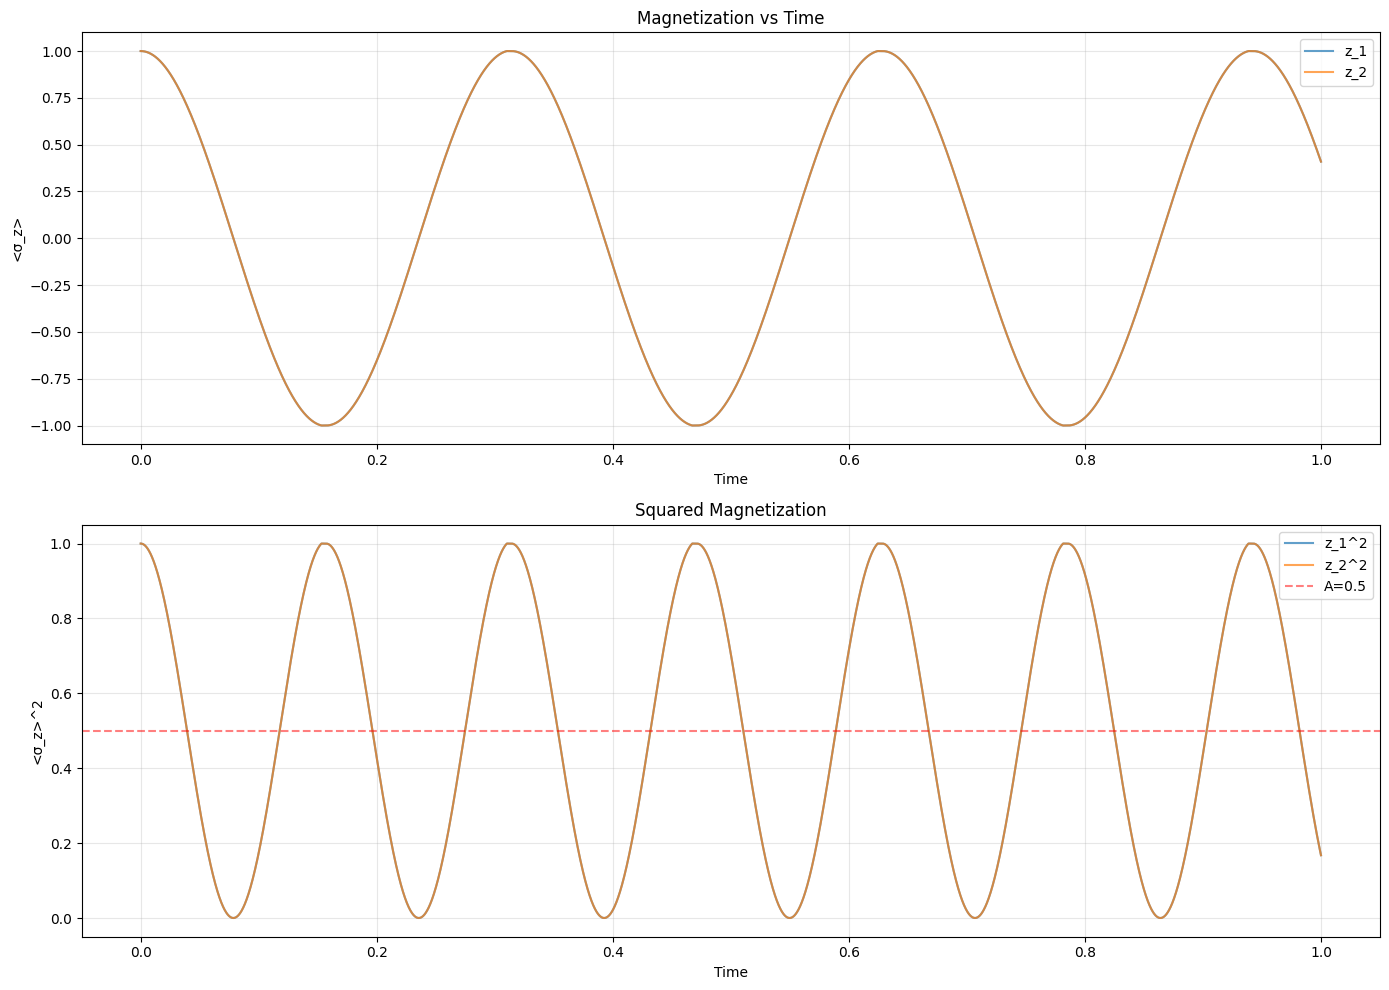

In [10]:

sim = LQubitCorrelationSimulator(
    L= 2,
    J=10.0,
    epsilon=0.0,
    N_steps=10000,
    T=1.0,
)

print(f"Simulation parameters:")
print(f"  J = {sim.J}")
print(f"  ε = {sim.epsilon}")
print(f"  N = {sim.N_steps}")
print(f"  T = {sim.T}")
print(f"  dt = {sim.dt:.6f}")
print(f"  T/τ = N×ε² = {sim.N_steps * sim.epsilon**2:.3f}")

# Simulate single trajectory
Q, z_traj, xi_traj = sim.simulate_trajectory()

# Plot z values over time
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

times = np.linspace(0, sim.T, sim.N_steps + 1)

# Plot z_i
for i in range(sim.L):
    axes[0].plot(times, z_traj[:, i], label=f'z_{i+1}', alpha=0.7)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('<σ_z>')
axes[0].set_title('Magnetization vs Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot z_i²
for i in range(sim.L):
    axes[1].plot(times, z_traj[:, i]**2, label=f'z_{i+1}^2', alpha=0.7)
axes[1].axhline(y=0.5, color='r', linestyle='--', label='A=0.5', alpha=0.5)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('<σ_z>^2')
axes[1].set_title('Squared Magnetization')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

### PBC Trajectory Check
simultaing results for PBC, L = 3, epsilon = 0

Simulation parameters:
  J = 10.0
  ε = 0.0
  N = 10000
  T = 1.0
  dt = 0.000100
  T/τ = N×ε² = 0.000
  Theoretical ⟨Q⟩ = 3T/τ = 0.000 (if A=0.5)


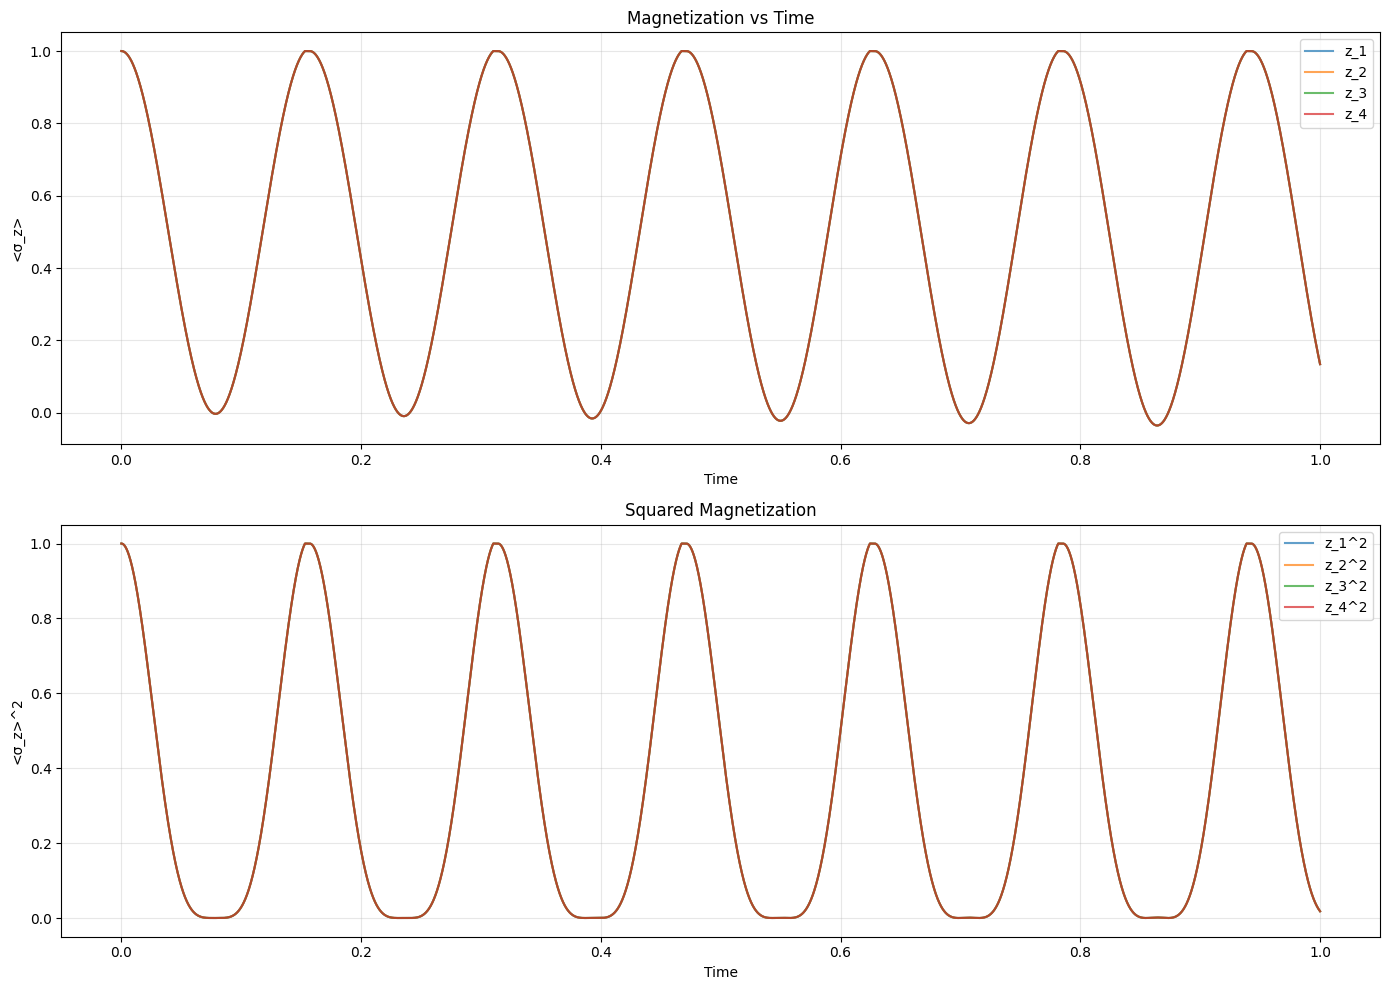

In [ ]:

sim = LQubitCorrelationSimulator(
    L= 3,
    J=10.0,
    epsilon=0.0,
    N_steps=10000,
    T=1.0,
    closed_boundary=True
)

print(f"Simulation parameters:")
print(f"  J = {sim.J}")
print(f"  ε = {sim.epsilon}")
print(f"  N = {sim.N_steps}")
print(f"  T = {sim.T}")
print(f"  dt = {sim.dt:.6f}")
print(f"  T/τ = N×ε² = {sim.N_steps * sim.epsilon**2:.3f}")
print(f"  Theoretical ⟨Q⟩ = 3T/τ = {3 * sim.N_steps * sim.epsilon**2:.3f} (if A=0.5)")

# Simulate single trajectory
Q, z_traj, xi_traj = sim.simulate_trajectory()

# Plot z values over time
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

times = np.linspace(0, sim.T, sim.N_steps + 1)

# Plot z_i
for i in range(sim.L):
    axes[0].plot(times, z_traj[:, i], label=f'z_{i+1}', alpha=0.7)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('<σ_z>')
axes[0].set_title('Magnetization vs Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot z_i²
for i in range(sim.L):
    axes[1].plot(times, z_traj[:, i]**2, label=f'z_{i+1}^2', alpha=0.7)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('<σ_z>^2')
axes[1].set_title('Squared Magnetization')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

### PBC ensamble Check
simultaing results for PBC, L = 3, epsilon = 0.01

Simulating trajectories:   0%|          | 0/10000 [00:00<?, ?it/s]

Simulating trajectories: 100%|██████████| 10000/10000 [2:49:55<00:00,  1.02s/it]      



ENSEMBLE RESULTS (n = 10000)

Entropy Production:
  Observed <Q> = 3.9946 ± 2.0770 (variance = 4.3137)
  Theoretical <Q> (A=0.5) = 4.5000
  Predicted (observed A) = 0.0000
  Ratio (obs/theory) = 0.8877

Magnetization Squared:
  A_1 = <z_1²> = 0.3374
  A_2 = <z_2²> = 0.3360
  A_3 = <z_3²> = 0.3378
  A_avg = 0.3371

Parameters:
  T/τ = 0.0000
  J = 10.0
  ε = 0.01


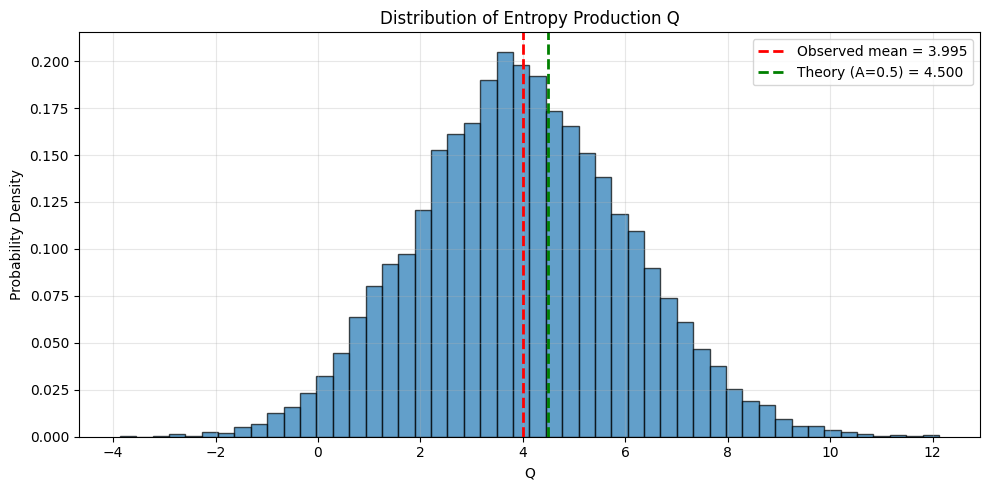

In [ ]:
L = 3
J = 10.0
epsilon = 0.01
N_steps = 10000
T = 1.0
n_traj = 10000
# Simulate open boundary conditions
sim_ensemble = LQubitCorrelationSimulator(L=L, J=J, epsilon=epsilon, N_steps=N_steps,
                                     T=T, closed_boundary=True)
Q, z, xi = sim_ensemble.simulate_ensemble(n_traj, progress=True)

# Calculate statistics
mean_Q = np.mean(Q)
std_Q = np.std(Q)
variance_Q = np.var(Q)
theoretical_Q = sim_ensemble.theoretical_prediction()
# Calculate observed A = ⟨z²⟩
z_squared = z**2  # shape (n_traj, N_steps+1, 2)
A_per_qubit = np.mean(z_squared, axis=(0, 1))  # Average over trajectories and time
A_total = np.mean(z_squared)  # Overall average
mean_z = z.mean(axis=(0, 2))

# Calculate predicted Q using observed A
T_over_tau = sim_ensemble.N_steps * sim_ensemble.epsilon**2
predicted_Q_from_A = 2.0 * T_over_tau * (A_total + 1.0)

print(f"\n{'='*60}")
print(f"ENSEMBLE RESULTS (n = {n_traj})")
print(f"{'='*60}")
print(f"\nEntropy Production:")
print(f"  Observed <Q> = {mean_Q:.4f} ± {std_Q:.4f} (variance = {variance_Q:.4f})")
print(f"  Theoretical <Q> (A=0.5) = {theoretical_Q:.4f}")
print(f"  Predicted (observed A) = {predicted_Q_from_A:.4f}")
print(f"  Ratio (obs/theory) = {mean_Q/theoretical_Q:.4f}")
print(f"\nMagnetization Squared:")
for i in range(L):
    print(f"  A_{i+1} = <z_{i+1}²> = {A_per_qubit[i]:.4f}")
print(f"  A_avg = {A_total:.4f}")
print(f"\nParameters:")
print(f"  T/τ = {T_over_tau:.4f}")
print(f"  J = {sim_ensemble.J}")
print(f"  ε = {sim_ensemble.epsilon}")

#plotting the distribution of Q
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Histogram of Q
ax.hist(Q, bins=50, density=True, alpha=0.7, edgecolor='black')
ax.axvline(mean_Q, color='r', linestyle='--', linewidth=2, label=f'Observed mean = {mean_Q:.3f}')
ax.axvline(theoretical_Q, color='g', linestyle='--', linewidth=2, label=f'Theory (A=0.5) = {theoretical_Q:.3f}')
ax.set_xlabel('Q')
ax.set_ylabel('Probability Density')
ax.set_title('Distribution of Entropy Production Q')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

0.0001


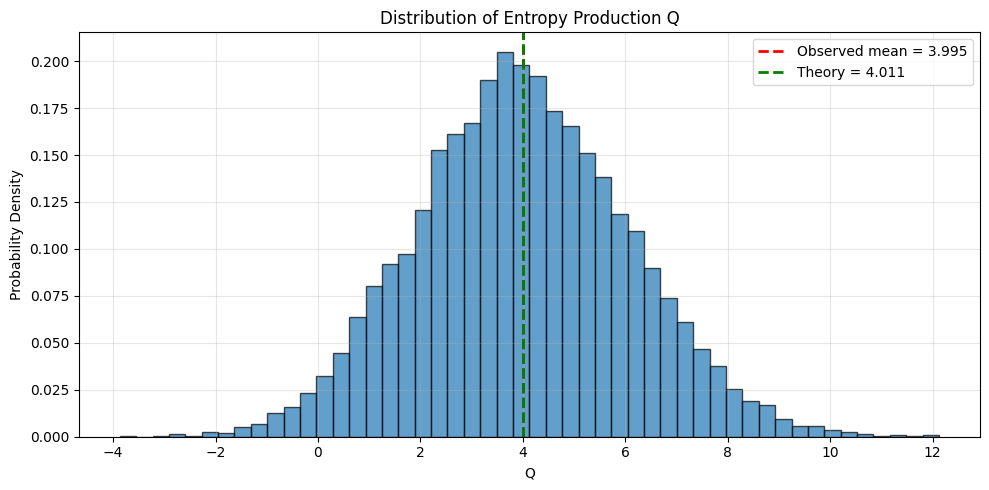

In [21]:
#plotting the distribution of Q
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

A_sum = np.sum(A_per_qubit + 1.0)
T_over_tau = sim_ensemble.N_steps * sim_ensemble.epsilon**2
print(sim_ensemble.epsilon**2)
theoretical_Q = T_over_tau * A_sum
# Histogram of Q
ax.hist(Q, bins=50, density=True, alpha=0.7, edgecolor='black')
ax.axvline(mean_Q, color='r', linestyle='--', linewidth=2, label=f'Observed mean = {mean_Q:.3f}')
ax.axvline(theoretical_Q, color='g', linestyle='--', linewidth=2, label=f'Theory = {theoretical_Q:.3f}')
ax.set_xlabel('Q')
ax.set_ylabel('Probability Density')
ax.set_title('Distribution of Entropy Production Q')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()